In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv(r"C:\Users\amits\Desktop\dataset.csv")
data.sample(5)

,itching,skin_rash,nodal_skin_eruptions,continuous_sneezing,shivering,chills,joint_pain,stomach_pain,acidity,ulcers_on_tongue,...,blackheads,scurring,skin_peeling,silver_like_dusting,small_dents_in_nails,inflammatory_nails,blister,red_sore_around_nose,yellow_crust_ooze,prognosis
3337,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Chicken pox
3250,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,Migraine
183,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Typhoid
3700,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Hypertension
869,1,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,Drug Reaction


In [3]:
print (f"The dataset contains {data.shape[0]} rows and {data.shape[1]-1} features.")
print(f"The dataset have {data.iloc[:,-1].nunique()} unique diseases.")

The dataset contains 4962 rows and 132 features.
The dataset have 41 unique diseases.


### Finding out if there is any linear relationship between features using correlation coefficient and then visualizing it in a heatmap

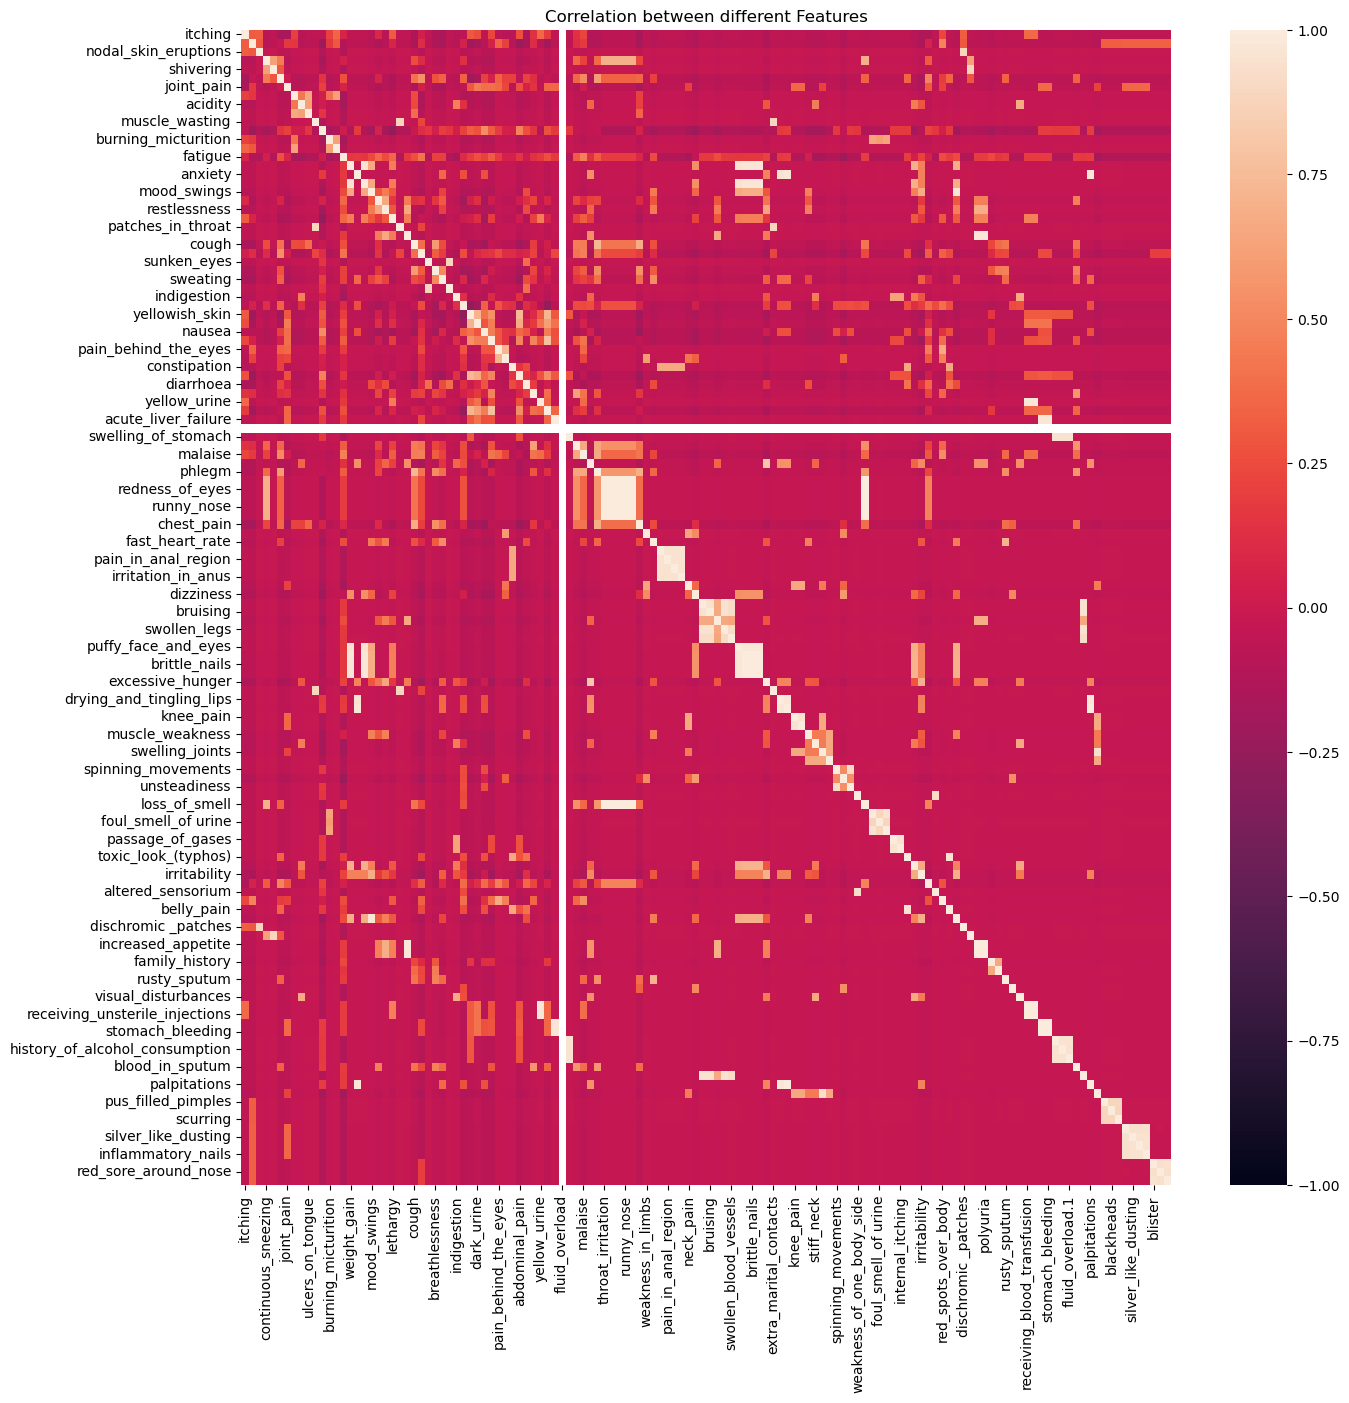

In [4]:
corr_df = data.iloc[:,:-1].corr()
plt.figure(figsize=(15,15))
plt.title('Correlation between different Features')
sns.heatmap(corr_df, vmax=1, vmin=-1)
plt.show()

### Identifying if there is any multiple colinearity among features

In [5]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIF = pd.DataFrame()
VIF['feature'] = data.iloc[:,:-1].columns
VIF['VIF'] = [variance_inflation_factor(data.iloc[:,:-1].values, i) for i in range(data.iloc[:,:-1].shape[1])]

### Choosing only those features that have VIF less than 10

In [6]:
features_to_be_used = [VIF.iloc[i,0] for i in range(VIF.shape[0]) if VIF.iloc[i,1] < 10]
print (f"The features that are to be used for building the model are {features_to_be_used}\nThat means we have total {len(features_to_be_used)} features.")

The features that are to be used for building the model are ['itching', 'nodal_skin_eruptions', 'continuous_sneezing', 'shivering', 'stomach_pain', 'acidity', 'ulcers_on_tongue', 'muscle_wasting', 'burning_micturition', 'spotting_ urination', 'patches_in_throat', 'sunken_eyes', 'breathlessness', 'dehydration', 'weakness_in_limbs', 'swollen_blood_vessels', 'extra_marital_contacts', 'spinning_movements', 'unsteadiness', 'weakness_of_one_body_side', 'foul_smell_of urine', 'altered_sensorium', 'dischromic _patches', 'watering_from_eyes', 'family_history', 'mucoid_sputum', 'lack_of_concentration', 'pus_filled_pimples', 'blackheads', 'scurring']
That means we have total 30 features.


### Using only those 30 features that do not show linear correlation or multiple colinearity

In [7]:
all_feature_set = set(data.iloc[:,:-1].columns.to_list())
features_to_be_used = set(features_to_be_used)
features_to_be_discarded = all_feature_set - features_to_be_used
data.drop(columns=features_to_be_discarded, inplace=True)
data.sample(5)

,itching,nodal_skin_eruptions,continuous_sneezing,shivering,stomach_pain,acidity,ulcers_on_tongue,muscle_wasting,burning_micturition,spotting_ urination,...,altered_sensorium,dischromic _patches,watering_from_eyes,family_history,mucoid_sputum,lack_of_concentration,pus_filled_pimples,blackheads,scurring,prognosis
4921,0,0,1,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,Allergy
1888,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Alcoholic hepatitis
1578,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,Osteoarthristis
419,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,Fungal infection
1660,0,0,0,0,1,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,GERD


In [8]:
from sklearn.model_selection import train_test_split

X_train,  X_test, y_train, y_test = train_test_split(data.iloc[:,:-1], data.iloc[:,-1], train_size=0.85, stratify=data.iloc[:,-1])
print (f"Training set contains {X_train.shape[0]} observations and testing set contains {X_test.shape[0]} observations.")

Training set contains 4217 observations and testing set contains 745 observations.


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder().fit(y_train)
y_train = encoder.transform(y_train)
y_test =  encoder.transform(y_test)

### Defining function for metrices

In [10]:
def _get_metrics(y_test, y_predicted):
    """
    takes y_test and y_predicted as input and gives accuracy, precision, recall and f1 as output
    """
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    accuracy = accuracy_score(y_test, y_predicted)
    precision = precision_score(y_test, y_predicted, average = 'weighted')
    recall = recall_score(y_test, y_predicted, average = 'weighted')
    f1 = f1_score(y_test, y_predicted, average = 'weighted')
    return accuracy, precision, recall, f1

### modeling : K Nearest Neighbor

In [94]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV


parameters = {
    'n_neighbors' : np.arange(5, 20, 3)
}
grid_search = GridSearchCV(
    estimator = KNeighborsClassifier(n_jobs=-1),
    param_grid = parameters,
    cv = 5,
    n_jobs = -1,
    refit = True
).fit(X_train, y_train)
knn = grid_search.best_estimator_
y_pred = knn.predict(X_test)

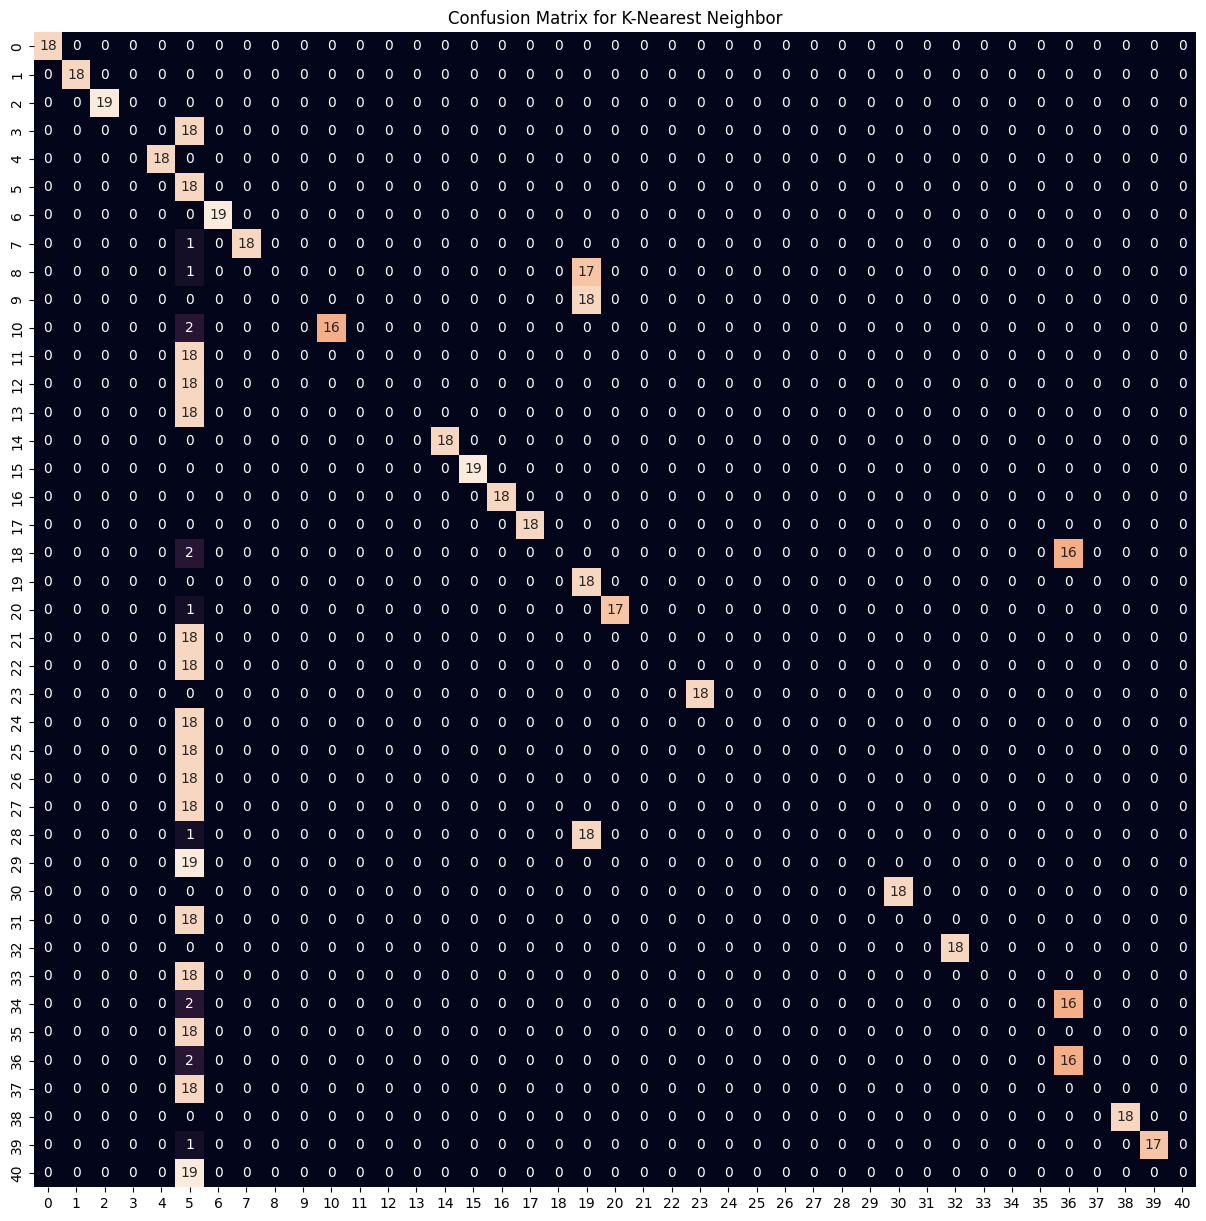

In [95]:
knn_metrices = _get_metrics(y_test, y_pred)
from sklearn.metrics import confusion_matrix, f1_score
from seaborn import heatmap
conf_mat = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(15,15))
heatmap(conf_mat,
        cbar=False,
        annot=True,
        fmt='.3g'
        )
plt.title('Confusion Matrix for K-Nearest Neighbor')
plt.show()

In [83]:
print (f"F1 score for KNN model is {f1_score(y_test, y_pred, average = 'weighted')}")

F1 score for KNN model is 0.4314929837846502


### modeling : Support Vector Classifier

In [19]:
from sklearn.svm import SVC
from sklearn.model_selection import RandomizedSearchCV #using randomizedsearchcv instead of gridsearchcv as gridsearchcv might take a long time; it's a trade off
parameters = {
    'kernel': ['linear', 'poly', 'rbf'],
    'C' : np.arange(0.1, 1, 0.2)
}
search = RandomizedSearchCV(
    estimator = SVC(),
    param_distributions = parameters,
    cv = 3,
    n_jobs = -1,
    refit = True,
    verbose = 2
).fit(X_train, y_train)
svc = search.best_estimator_
y_pred = svc.predict(X_test)

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
svc_metrices = _get_metrics(y_test, y_pred)
from sklearn.metrics import confusion_matrix, f1_score
from seaborn import heatmap
conf_mat = confusion_matrix(y_test, y_pred)

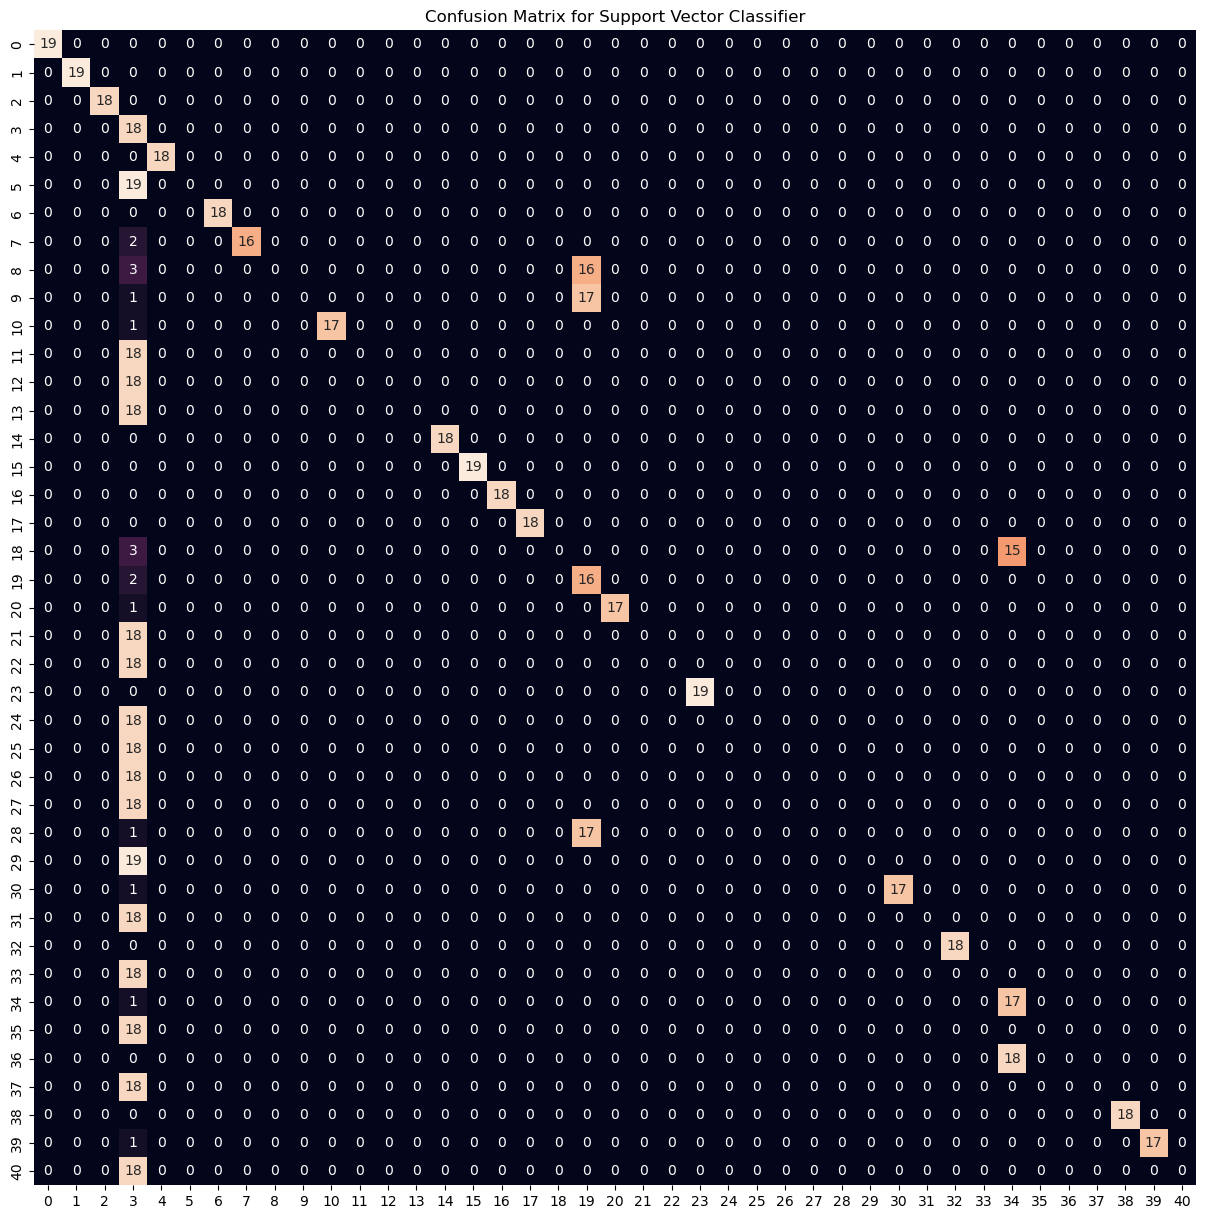

In [21]:
plt.figure(figsize=(15,15))
heatmap(conf_mat,
        cbar=False,
        annot=True,
        fmt='.3g'
        )
plt.title('Confusion Matrix for Support Vector Classifier')
plt.show()

In [22]:
print (f"F1 score for SVC model is {f1_score(y_test, y_pred, average = 'weighted')}")

F1 score for SVC model is 0.43574548899137794



### modeling : Logistic Regression Classifier

In [ ]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)
logreg_metrices = _get_metrics(y_test, y_pred)
from sklearn.metrics import confusion_matrix, f1_score
from seaborn import heatmap
conf_mat = confusion_matrix(y_test, y_pred)

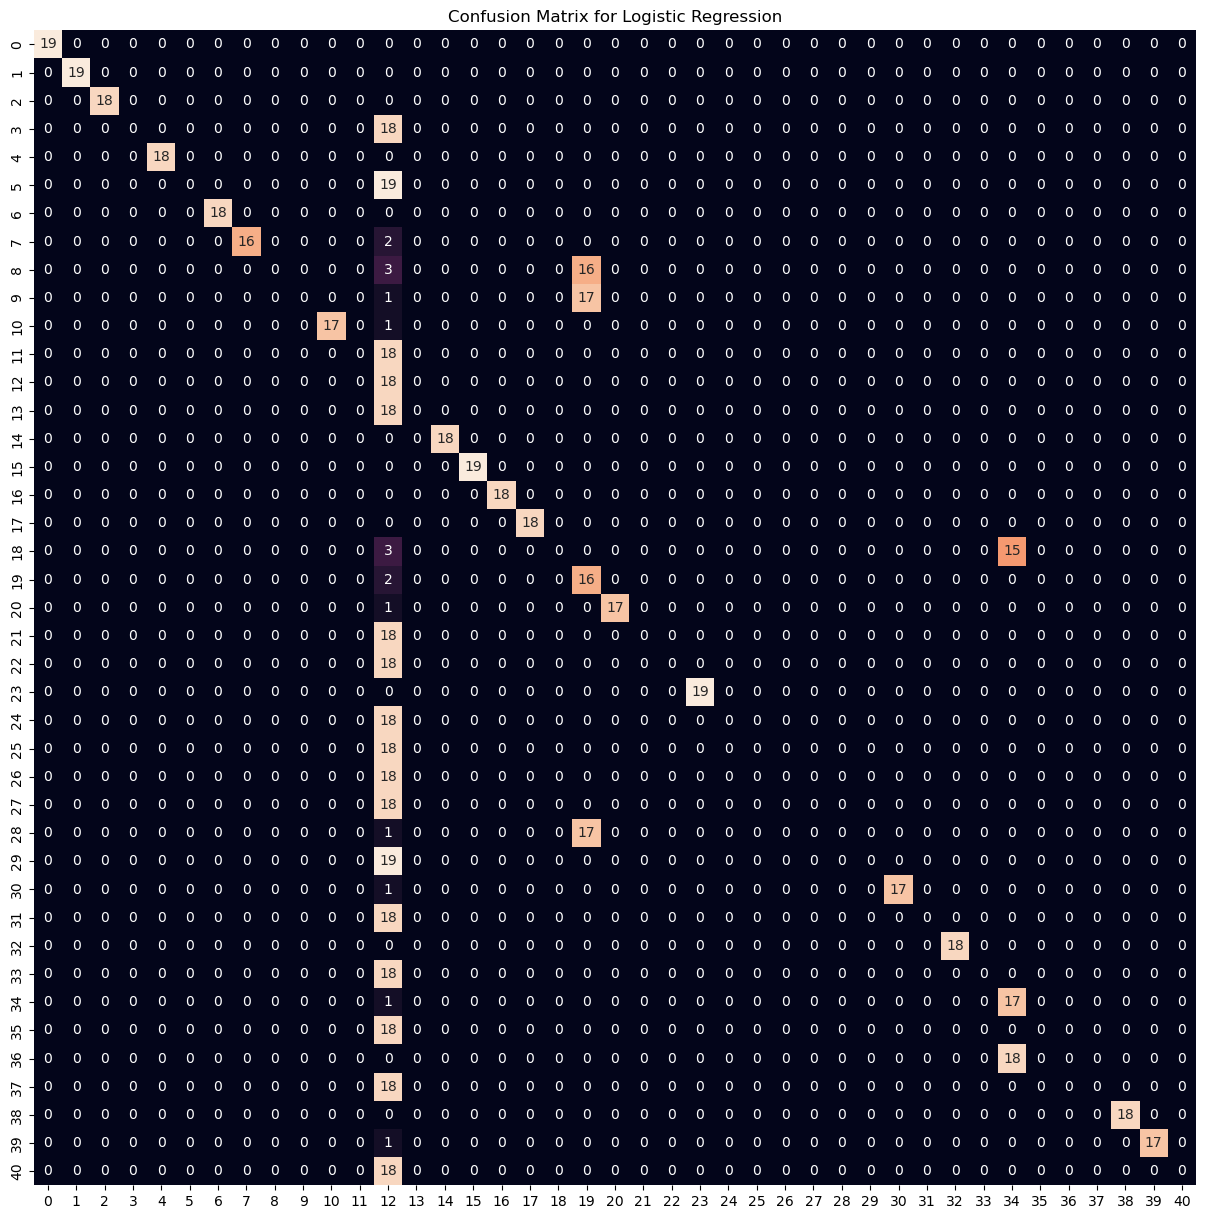

In [25]:
plt.figure(figsize=(15,15))
heatmap(conf_mat,
        cbar=False,
        annot=True,
        fmt='.3g'
        )
plt.title('Confusion Matrix for Logistic Regression')
plt.show()

In [26]:
from sklearn.ensemble import RandomForestClassifier
parameters = {
    'n_estimators' : np.arange(5, 10, 1),
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : np.arange(0.1, 1, 0.2),
    'min_samples_split' : np.arange(2, 10, 2),
    'max_depth' : [None, 10, 15, 20]
}
search = RandomizedSearchCV(
    estimator = RandomForestClassifier(),
    param_distributions = parameters,
    cv = 3,
    n_jobs = -1,
    verbose = 2
).fit(X_train, y_train)
rf = search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


In [ ]:
y_pred = rf.predict(X_test)
rf_metrices = _get_metrics(y_test, y_pred)
from sklearn.metrics import confusion_matrix, f1_score
from seaborn import heatmap
conf_mat = confusion_matrix(y_test, y_pred)

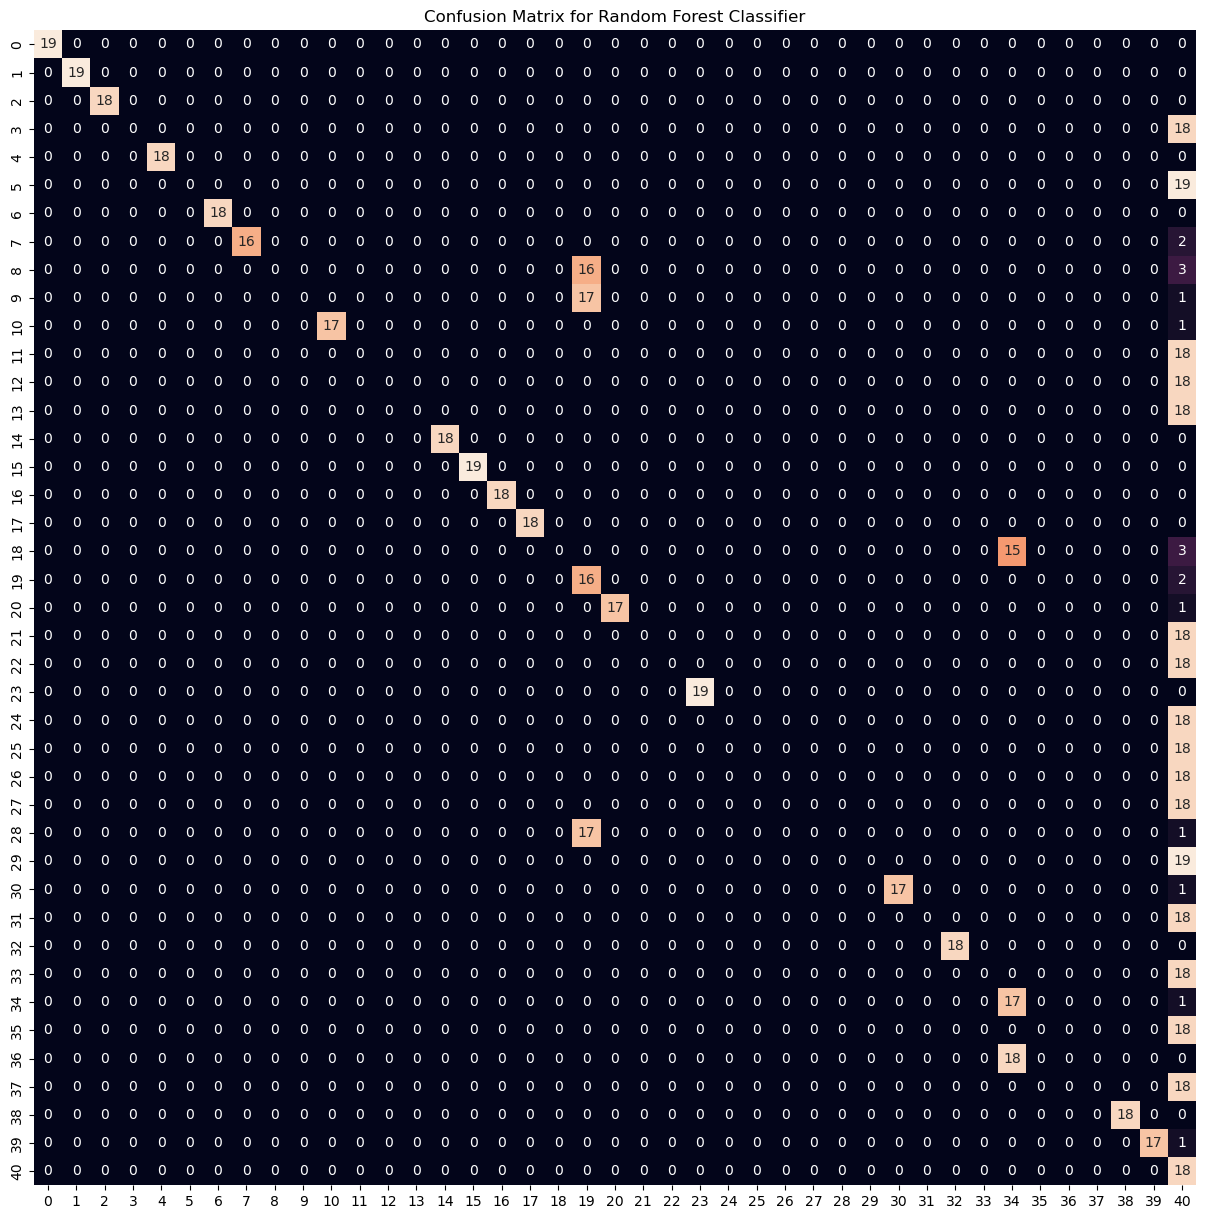

In [28]:
plt.figure(figsize=(15,15))
heatmap(conf_mat,
        cbar=False,
        annot=True,
        fmt='.3g'
        )
plt.title('Confusion Matrix for Random Forest Classifier')
plt.show()

In [29]:
print (f"F1 score for Random Forest model is {f1_score(y_test, y_pred, average = 'weighted')}")

F1 score for Random Forest model is 0.43574548899137794


### modeling : Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
parameters = {
    'criterion' : ['gini', 'entropy', 'log_loss'],
    'max_features' : np.arange(0.1, 1, 0.2),
    'min_samples_split' : np.arange(2, 10, 2),
    'max_depth' : [None, 10, 15, 20],
    'min_samples_leaf' : np.arange(1,10,2)
}
search = RandomizedSearchCV(
    estimator = DecisionTreeClassifier(),
    param_distributions = parameters,
    cv = 3,
    n_jobs = -1,
    verbose = 2
).fit(X_train, y_train)
dt = search.best_estimator_

Fitting 3 folds for each of 10 candidates, totalling 30 fits


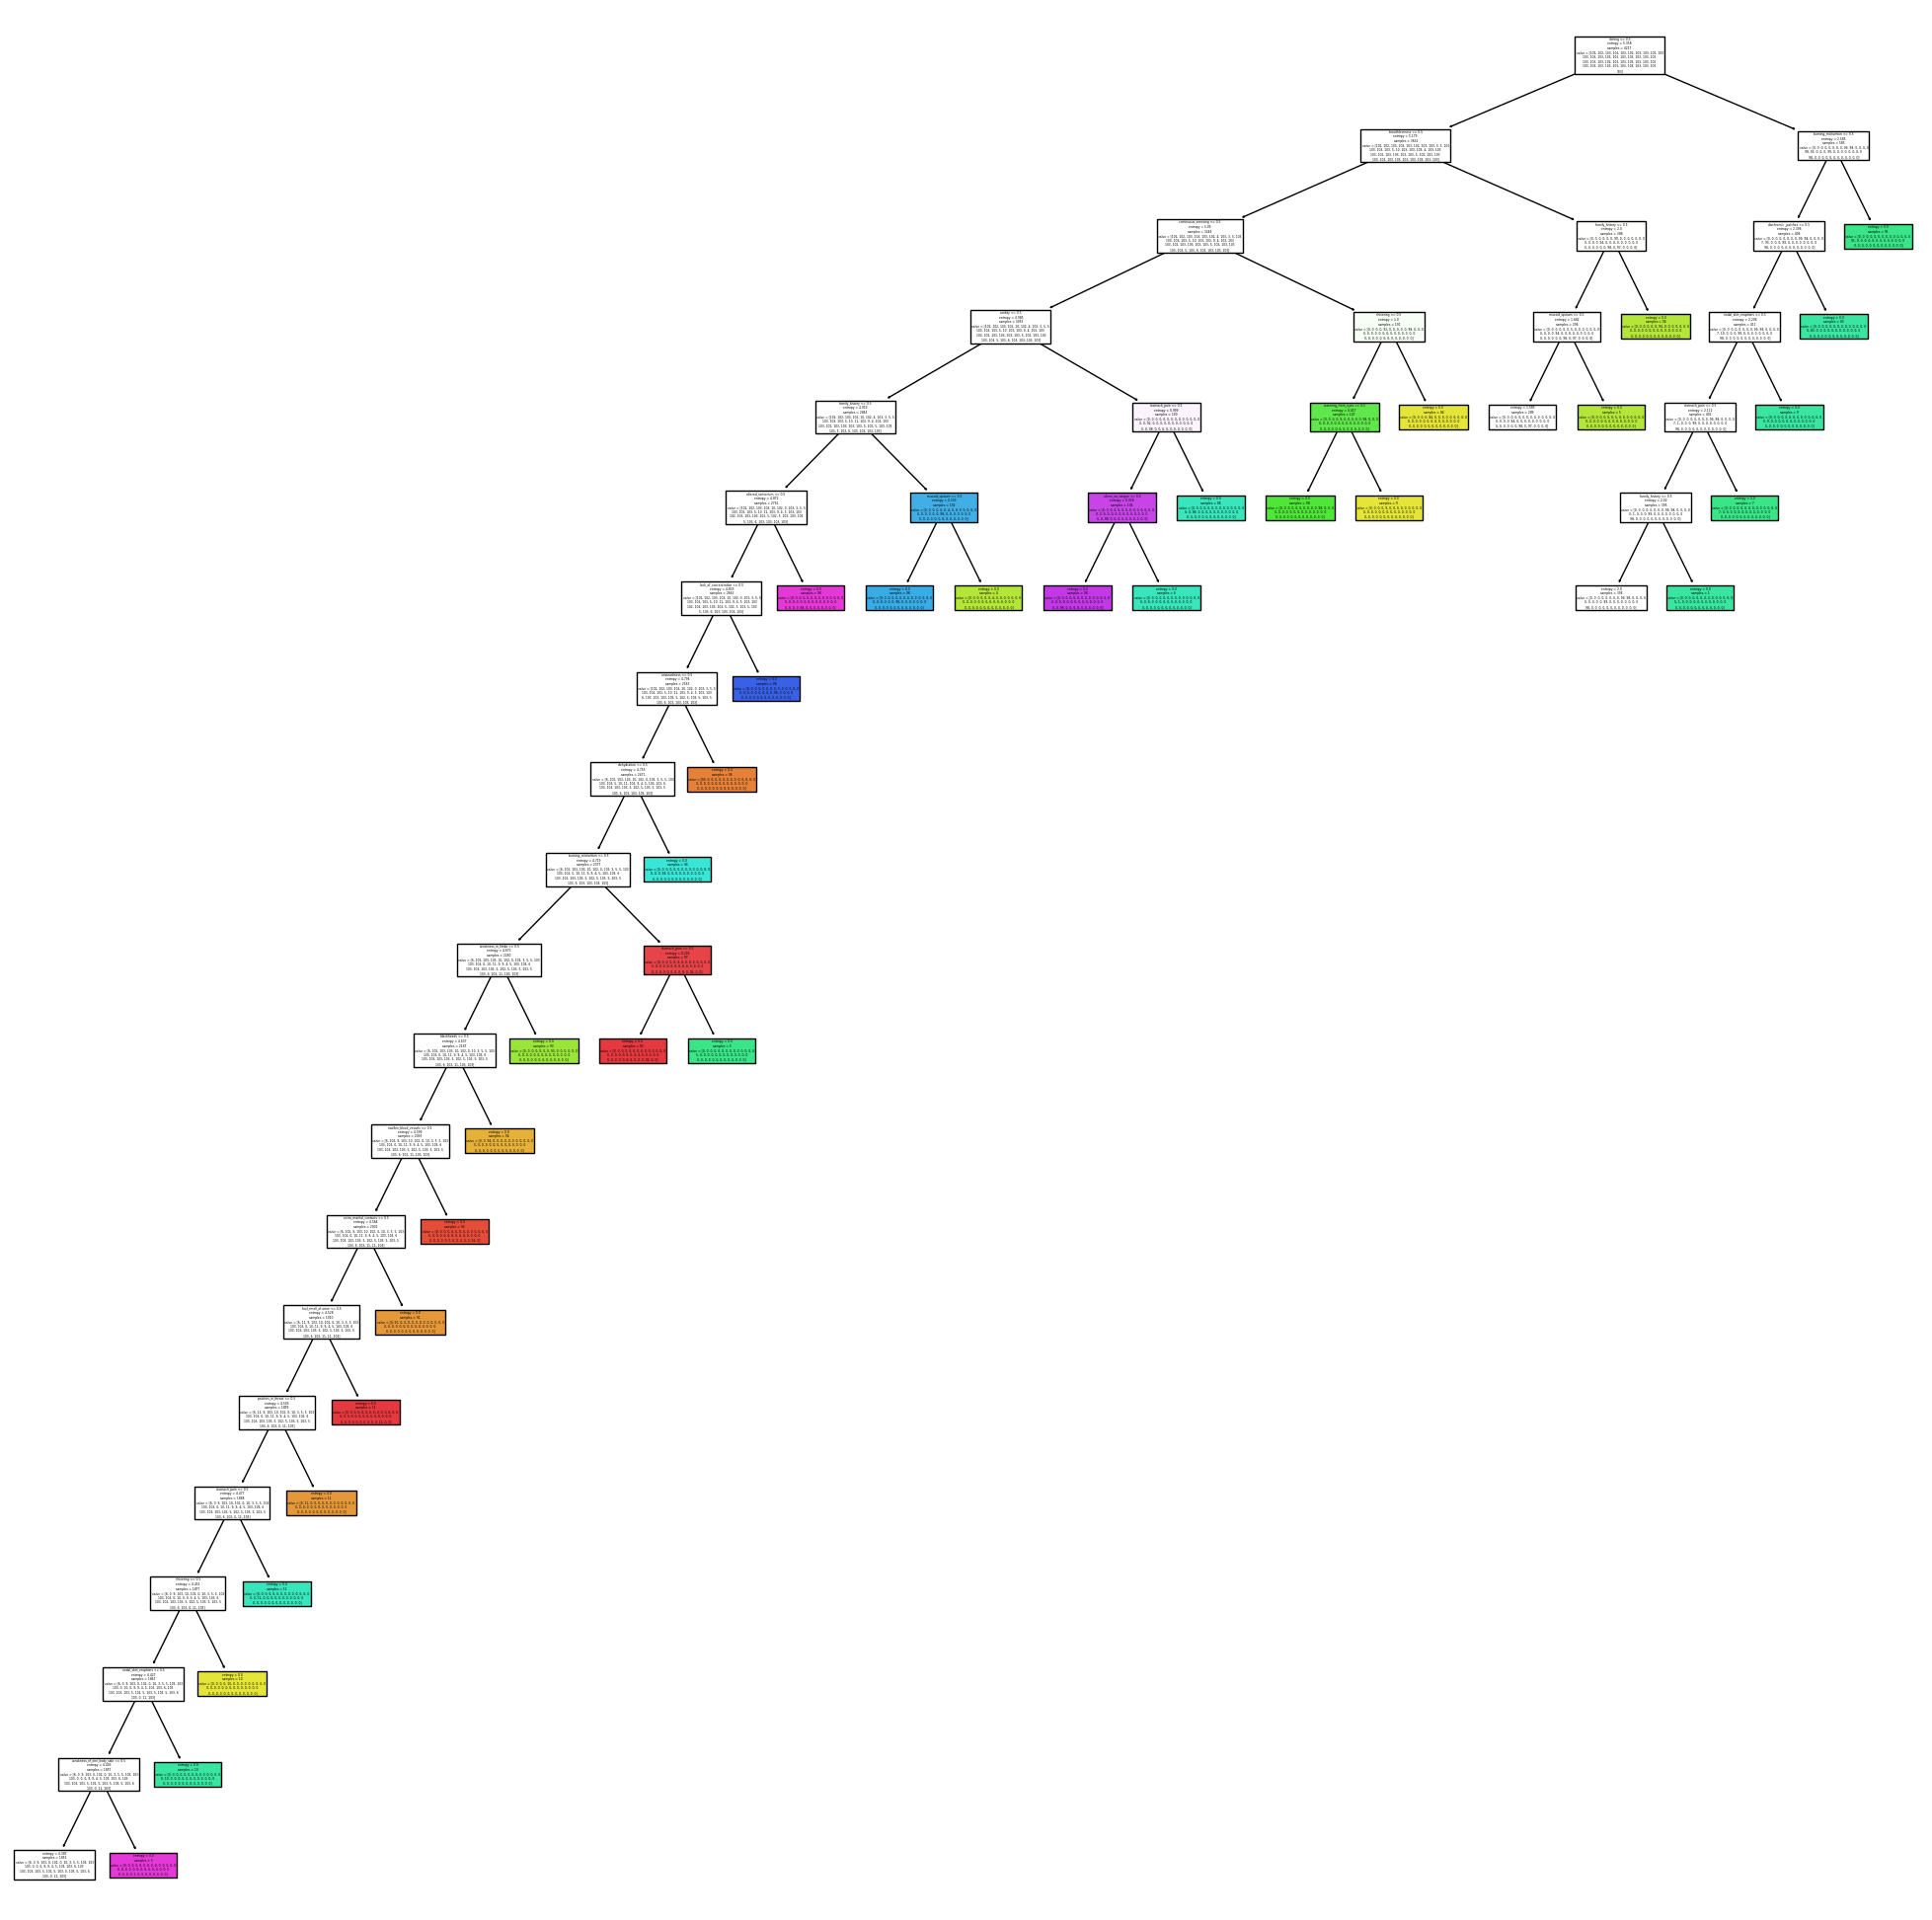

In [32]:
plt.figure(figsize=(25,25))
plot_tree(dt, filled=True, feature_names = X_train.columns.to_list())
plt.show()

### we can see that the decision tree model is overfitting

In [ ]:
y_pred = dt.predict(X_test)
rf_metrices = _get_metrics(y_test, y_pred)
from sklearn.metrics import confusion_matrix, f1_score
from seaborn import heatmap
conf_mat = confusion_matrix(y_test, y_pred)

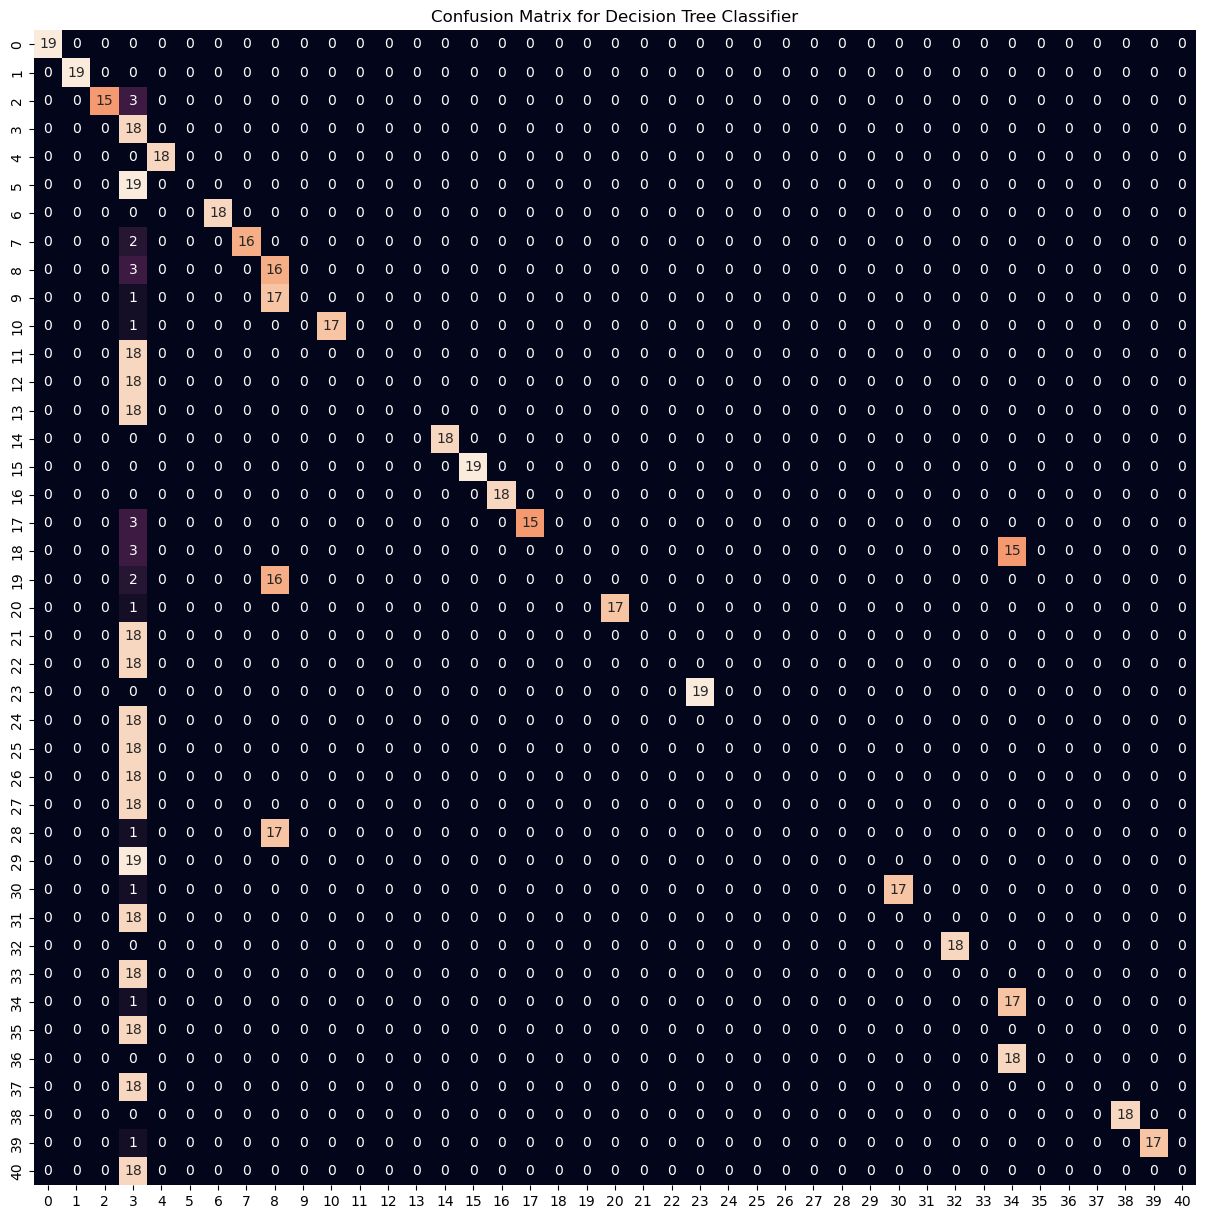

In [34]:
plt.figure(figsize=(15,15))
heatmap(conf_mat,
        cbar=False,
        annot=True,
        fmt='.3g'
        )
plt.title('Confusion Matrix for Decision Tree Classifier')
plt.show()

In [35]:
print (f"F1 score for Decision Tree model is {f1_score(y_test, y_pred, average = 'weighted')}")

F1 score for Decision Tree model is 0.4317060148208644


# As it is an augmented dataset, all the models are showing very low performance; but using a real-world dataset, the model might perform good enough to go to production.